# Team #5 Data Wrangling
Beth, Bushra, Geeta, Ha, Karthi, Ramya

### import drive and packages


---



In [ ]:
# to load the housing data drive go to google drive, 
# right click the housing data folder and add shortcut to drive, save in MyDrive

# mount google drive with data folders
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
### install and import packages, uncomment the packages when you first run file to install

#!pip install pandas-datareader
import pandas_datareader as pdr
import pandas as pd
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns

### load in data from drive

---



Our dependent variable is housing prices at the Metro level

In [ ]:
# Zillow Housing Data metro 
zillow_home = pd.read_csv('/content/drive/MyDrive/ds4_housing_data/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')

# transpose data so that rows are months and there is just one column for housing price
df = pd.DataFrame(zillow_home.iloc[0,5:]).reset_index()

#rename columns
df.columns = ['time', 'housing_price']

# set time column to datatime form and change to month year format
df['time'] = pd.to_datetime(df['time'])
df['time'] = df['time'].dt.strftime('%m/%Y')

# fred rental data metro 
rental = pdr.get_data_fred('CUUR0000SEHA', start='1980').reset_index()
rental.columns = ['time', 'rental_price']
rental['time'] = pd.to_datetime(rental['time'])
rental['time'] = rental['time'].dt.strftime('%m/%Y')

# inflation rate 1913-2014
inflation = pdr.get_data_fred('CPILFESL', start='1980').reset_index()
inflation.columns = ['time',  'inflation_rate']
inflation['time'] = pd.to_datetime(inflation['time'])
inflation['time'] = inflation['time'].dt.strftime('%m/%Y')

#us level property taxes (only have years not months, only for 2004-2022)
prop_tax = pd.read_csv('/content/drive/MyDrive/ds4_housing_data/property_tax.csv')
prop_tax.columns = ['time', 'median_house_value', 'median_tax_paid', 'property_tax_rate']
prop_tax['time'] = ['01/2022','01/2021','01/2020','01/2019', '01/2018', '01/2017', '01/2016',
                    '01/2015', '01/2014', '01/2013', '01/2012','01/2011', '01/2010',
                    '01/2009', '01/2008', '01/2007', '01/2006', '01/2005', '01/2004']

# median age of home buyers (by year)
age = pd.read_csv('/content/drive/MyDrive/ds4_housing_data/median_age.csv')
age.columns =['time', 'median_age_homebuyers']
age['time'] = ['01/2021','01/2020','01/2019', '01/2018', '01/2017', '01/2016',
               '01/2015', '01/2014', '01/2013', '01/2012','01/2011', '01/2010',
               '01/2009', '01/2008', '01/2007', '01/2006', '01/2005', '01/2004',
               '01/2003', '01/2002', '01/2001', '01/2000']
#housing starts
housing_starts=pdr.get_data_fred('HOUST', start='1980').reset_index()
housing_starts.columns = ['time', 'housing_starts']
housing_starts['time'] = pd.to_datetime(housing_starts['time'])
housing_starts['time'] = housing_starts['time'].dt.strftime('%m/%Y')

# interest rates 
interest=pdr.get_data_fred('FEDFUNDS', start='1980').reset_index()
interest.columns = ['time', 'interest_rate']
interest['time'] = pd.to_datetime(interest['time'])
interest['time'] = interest['time'].dt.strftime('%m/%Y')

# mortgage rates 
mortgage=pdr.get_data_fred('MORTGAGE30US', start='1980').reset_index()
mortgage.columns = ['time', 'mortgage_rate']
mortgage['time'] = pd.to_datetime(mortgage['time'])
mortgage['time'] = mortgage['time'].dt.strftime('%m/%Y')

# homebuyer income (data is quarterly)
income=pdr.get_data_fred('MDSP', start='1980').reset_index()
income.columns = ['time', 'mortgage_to_income_rate']
income['time'] = pd.to_datetime(income['time'])
income['time'] = income['time'].dt.strftime('%m/%Y')

# work from home rate 2020-2022
work_home = pd.read_csv('/content/drive/MyDrive/ds4_housing_data/Working_From_Home_National_May2020_Apr2022.csv', header=5)

# bit of a messy dataframe so transpose the whole thing
work_home = work_home.T

# select just the us data
work_home.columns = work_home.iloc[0].reset_index()

# select just the full-time worker data
work_home = pd.DataFrame(work_home.iloc[1:-2,2]).reset_index()

# rename columns 
work_home.columns = ['time', 'work_home_rate']

# rename dates
work_home['time'] = ['05/2020','06/2020','07/2020', '08/2020',
                     '09/2020', '10/2020', '11/2020', '12/2020', 
                     '01/2021', '02/2021', '03/2021', '04/2021',
                     '05/2021', '06/2021', '07/2021', '08/2021', 
                     '09/2021', '10/2021', '11/2021', '12/2021', 
                     '01/2022', '02/2022', '03/2022', '04/2022']

# make list of dataframes to merge
data_frames = [df, rental, inflation, prop_tax, age, housing_starts, interest, mortgage, income, work_home]

# merge the dataframes
df_merged = reduce(lambda  left,right:
                   pd.merge(left,right,on=['time'],how='outer'), data_frames)
# sort by time
df_merged = df_merged.sort_values(by='time')
#df_merged.to_csv('housing_data_for_eda.csv')
# get years after 2005
df_merged["time"] = pd.to_datetime(df_merged["time"])
df_merged = df_merged.loc[df_merged['time'].dt.year >= 2005]

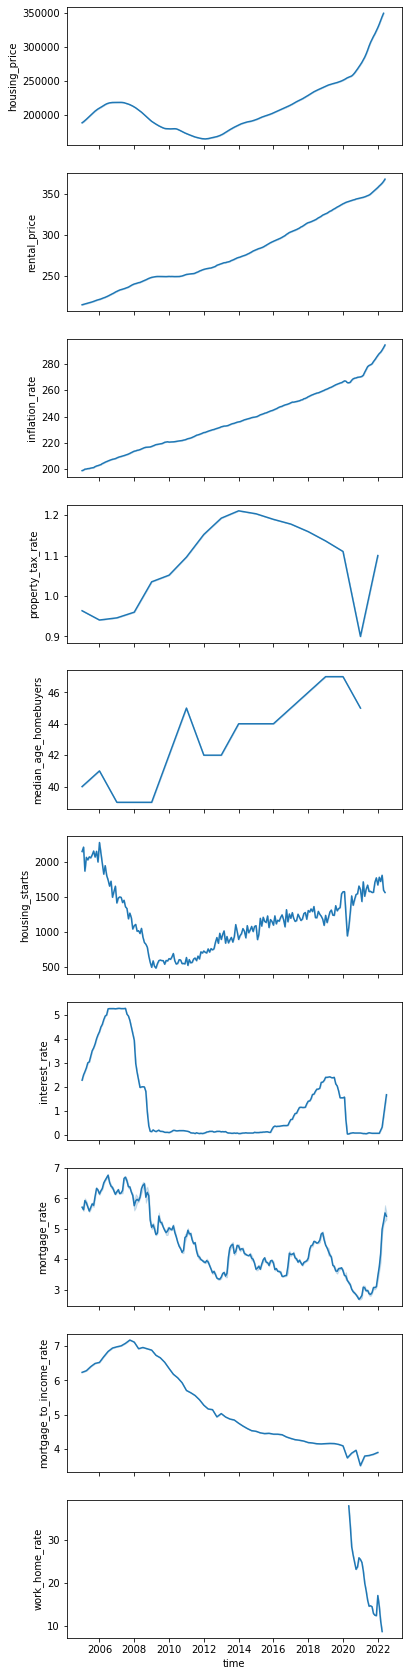

In [ ]:
# plot the wrangled data!
fig, axs = plt.subplots(sharex=True, nrows=10, figsize=(6,30))
sns.lineplot(x=df_merged['time'],y=df_merged['housing_price'],  ax=axs[0] )
sns.lineplot(x=df_merged['time'],y= df_merged['rental_price'],  ax=axs[1] )
sns.lineplot(x=df_merged['time'],y= df_merged['inflation_rate'],  ax=axs[2] )
sns.lineplot(x=df_merged['time'],y=df_merged['property_tax_rate'],  ax=axs[3] )
sns.lineplot(x=df_merged['time'],y= df_merged[ 'median_age_homebuyers'],  ax=axs[4] )
sns.lineplot(x=df_merged['time'],y= df_merged['housing_starts'],  ax=axs[5] )
sns.lineplot(x=df_merged['time'],y=df_merged[ 'interest_rate'],  ax=axs[6] )
sns.lineplot(x=df_merged['time'],y= df_merged[ 'mortgage_rate'],  ax=axs[7] )
sns.lineplot(x=df_merged['time'],y= df_merged['mortgage_to_income_rate'],  ax=axs[8] )
sns.lineplot(x=df_merged['time'],y= df_merged['work_home_rate'],  ax=axs[9] )